# Exploring the Lovecraft Corpus - Sentiment Analysis  
Ryan Folks  
vcz2aj@virginia.edu  

### Objective: The objective of this notebook is to apply sentiment analysis to the lovecraft corpus.
---

In [1]:
import pandas as pd
import plotly.express as px

In [2]:
data_home = 'data'
data_path = 'output'
data_prefix = 'lovecraft'
novels_csv = '{0}/{1}/{2}_CORPUS.csv'.format(data_home, data_path, data_prefix)
vocab_csv = '{0}/{1}/{2}_VOCAB.csv'.format(data_home, data_path, data_prefix)
lib_csv = '{0}/{1}/{2}_LIB.csv'.format(data_home,data_path,  data_prefix)
bow_csv = '{0}/{1}/{2}_BOW.csv'.format(data_home, data_path, data_prefix)
salex_csv = '{}/{}/salex_nrc.csv'.format(data_home, data_path)

In [3]:
OHCO = ['title', 'para_num', 'sent_num', 'term_str']

In [4]:
SALEX = pd.read_csv(salex_csv).set_index('term_str')
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]

In [5]:
SALEX

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,polarity
term_str,,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0,-1
abandoned,1,0,0,1,0,1,0,1,0,0,-1
abandonment,1,0,0,1,0,1,0,1,1,0,-1
abduction,0,0,0,1,0,1,0,1,1,0,-1
aberration,0,0,1,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
young,0,1,0,0,1,0,1,0,1,0,1
youth,1,1,0,1,1,0,1,0,1,0,1
zeal,0,1,0,0,1,0,1,0,1,1,1


In [6]:
TOKENS = pd.read_csv(novels_csv).set_index(['title', 'para_num', 'sent_num', 'token_num'])
VOCAB = pd.read_csv(vocab_csv).set_index('term_str')
LIB = pd.read_csv(lib_csv).set_index('title')
BOW = pd.read_csv(bow_csv).set_index(['title', 'sent_num', 'term_str'])

In [7]:
BOW

para_num  n  tf  tfidf
title                sent_num term_str                        
a garden             0        ,                0  3 NaN    NaN
                              .                0  1 NaN    NaN
                              ;                0  1 NaN    NaN
                              an               0  1 NaN    NaN
                              ancient          0  2 NaN    NaN
...                                          ... ..  ..    ...
what the moon brings 17       upon             0  1 NaN    NaN
                              walls            0  1 NaN    NaN
                              weedy            0  1 NaN    NaN
                              where            0  1 NaN    NaN
                              world            0  1 NaN    NaN

[501552 rows x 4 columns]

In [8]:
TOKENS.join(LIB).join(SALEX, on='term_str').join(BOW, on=['title', 'sent_num', 'term_str'])

pos_tuple  \
title                                         para_num sent_num token_num                        
the alchemist                                 0        0        0              ('High', 'NNP')   
                                                                1                 ('up', 'RB')   
                                                                2                   (',', ',')   
                                                                3          ('crowning', 'VBG')   
                                                                4                ('the', 'DT')   
...                                                                                        ...   
waste paper a poem of profound insignificance 0        59       1               ('home', 'NN')   
                                                                2                 ('In', 'IN')   
                                                                3                ('the', 'DT')   
                                                                4            ('shantih', 'NN')   
                                                                5                   ('.', '.')   

                                                                           pos  \
title                                         para_num sent_num token_num        
the alchemist                                 0        0        0          NNP   
                                                                1           RB   
                                                                2            ,   
                                                                3          VBG   
                                                                4           DT   
...                                                                        ...   
waste paper a poem of profound insignificance 0        59       1           NN   
                                                                2           IN   
                                                                3           DT   
                                                                4           NN   
                                                                5            .   

                                                                          token_str  \
title                                         para_num sent_num token_num             
the alchemist                                 0        0        0              High   
                                                                1                up   
                                                                2                 ,   
                                                                3          crowning   
                                                                4               the   
...                                                                             ...   
waste paper a poem of profound insignificance 0        59       1              home   
                                                                2                In   
                                                                3               the   
                                                                4           shantih   
                                                                5                 .   

                                                                           term_str  \
title                                         para_num sent_num token_num             
the alchemist                                 0        0        0              high   
                                                                1                up   
                                                                2                 ,   
                                                                3          crowning   
                                                                4               the   
..

In [9]:
COMBO = TOKENS.join(LIB).join(SALEX, on='term_str').join(BOW, on=['title', 'sent_num', 'term_str'])
COMBO = COMBO.drop(['n', 'tf'], axis=1)
COMBO = COMBO.sort_index()

In [10]:
COMBO

pos_tuple  pos  \
title                para_num sent_num token_num                           
a garden             0        0        0            ('There', 'EX')   EX   
                                       1               ('’', 'NNP')  NNP   
                                       2               ('s', 'VBD')  VBD   
                                       3               ('an', 'DT')   DT   
                                       4          ('ancient', 'NN')   NN   
...                                                             ...  ...   
what the moon brings 0        17       26             ('the', 'DT')   DT   
                                       27           ('world', 'NN')   NN   
                                       28             ("'s", 'POS')  POS   
                                       29            ('dead', 'JJ')   JJ   
                                       30                ('.', '.')    .   

                                                 token_str term_str pos_group  \
title                para_num sent_num token_num                                
a garden             0        0        0             There    there        EX   
                                       1                 ’        ’        NN   
                                       2                 s        s        VB   
                                       3                an       an        DT   
                                       4           ancient  ancient        NN   
...                                                    ...      ...       ...   
what the moon brings 0        17       26              the      the        DT   
                                       27            world    world        NN   
                                       28               's       's        PO   
                                       29             dead     dead        JJ   
                                       30                .        .         .   

                                                                                 filepath  \
title                para_num sent_num token_num                                            
a garden             0        0        0                         data/poetry\A Garden.txt   
                                       1                         data/poetry\A Garden.txt   
                                       2                         data/poetry\A Garden.txt   
                                       3                         data/poetry\A Garden.txt   
                                       4                         data/poetry\A Garden.txt   
...                                                                                   ...   
what the moon brings 0        17       26         data/short_stories\what_moon_brings.txt   
                                       27         data/short_stories\what_moon_brings.txt   
                                       28         data/short_stories\what_moon_brings.txt   
                                       29         data/short_stories\what_moon_brings.txt   
                                       30         data/short_stories\what_moon_brings.txt   

                                                  date     category  anger  \
title                para_num sent_num token_num                             
a garden             0        0        0          1917         poem    NaN   
                                       1          1917         poem    NaN   
                                       2          1917         poem    NaN   
                                       3          1917         poem    NaN   
                                       4          1917         poem    NaN   
...                                                ...          ...    ...   
what the moon brings 0        17       26         1922  short story    NaN   
                                       27         1922  short story    NaN   
                         

In [11]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()
BOOKS = COMBO.groupby(OHCO[:1])[emo_cols].mean()

In [12]:
BOOKS

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,polarity
title,,,,,,,,,
a garden,0.142857,0.285714,0.214286,0.214286,0.214286,0.428571,0.071429,0.071429,-0.214286
an american to mother england,0.135135,0.459459,0.108108,0.243243,0.594595,0.162162,0.270270,0.513514,0.378378
arcadia,0.200000,0.600000,0.200000,0.200000,0.600000,0.400000,0.200000,0.600000,0.400000
astrophobos,0.166667,0.333333,0.194444,0.222222,0.472222,0.166667,0.055556,0.361111,0.194444
at the mountains of madness,0.252655,0.254425,0.191150,0.379646,0.203982,0.326106,0.173451,0.319027,-0.134071
...,...,...,...,...,...,...,...,...,...
"to clark ashton smith, esq., upon his phantastick tales, verses, pictures, and sculptures",0.285714,0.142857,0.428571,0.571429,0.000000,0.285714,0.000000,0.142857,-0.714286
"to edward john moreton drax plunkett, eighteenth baron dunsany",0.066667,0.533333,0.044444,0.155556,0.666667,0.200000,0.177778,0.377778,0.511111
"unda; or, the bride of the sea",0.171875,0.484375,0.125000,0.281250,0.453125,0.281250,0.250000,0.328125,0.109375


In [13]:
BOOKS.style.background_gradient(cmap='GnBu', axis=None)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,polarity
title,,,,,,,,,
a garden,0.142857,0.285714,0.214286,0.214286,0.214286,0.428571,0.071429,0.071429,-0.214286
an american to mother england,0.135135,0.459459,0.108108,0.243243,0.594595,0.162162,0.270270,0.513514,0.378378
arcadia,0.200000,0.600000,0.200000,0.200000,0.600000,0.400000,0.200000,0.600000,0.400000
astrophobos,0.166667,0.333333,0.194444,0.222222,0.472222,0.166667,0.055556,0.361111,0.194444
at the mountains of madness,0.252655,0.254425,0.191150,0.379646,0.203982,0.326106,0.173451,0.319027,-0.134071
azathoth,0.360000,0.400000,0.240000,0.400000,0.280000,0.440000,0.080000,0.200000,-0.120000
beyond the wall of sleep,0.243816,0.265018,0.176678,0.349823,0.272085,0.307420,0.144876,0.360424,0.003534
celephais,0.247934,0.396694,0.123967,0.264463,0.512397,0.239669,0.190083,0.363636,0.165289
christmas,0.000000,0.750000,0.000000,0.000000,1.000000,0.250000,0.000000,0.500000,1.000000


In [15]:
BOOKS.to_csv('data/output/lovecraft_SENTIMENT.csv')

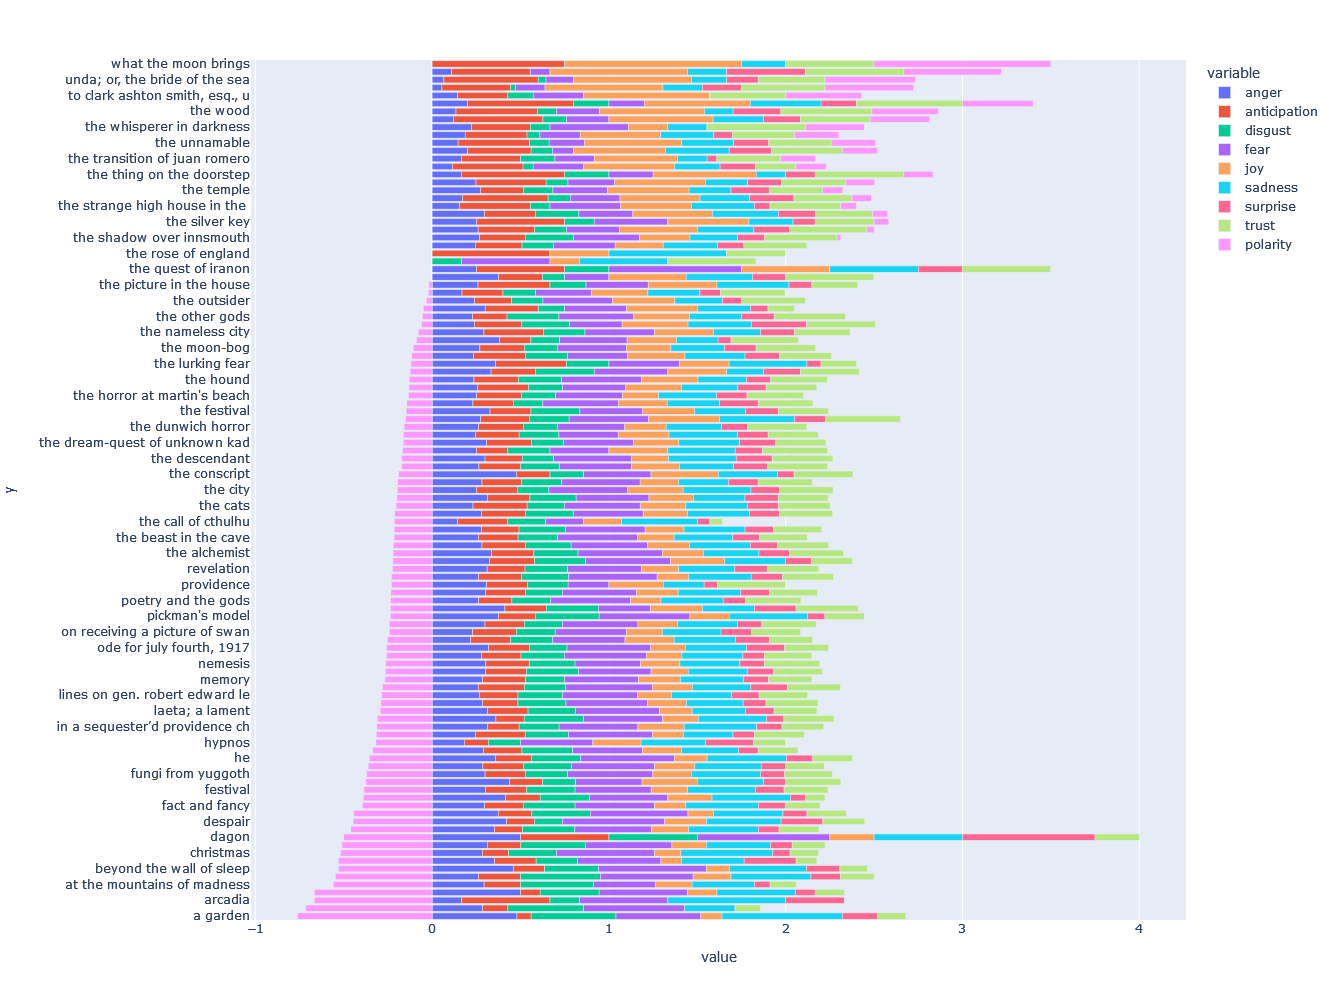

In [21]:
SENTIMENT = pd.read_csv('data/output/lovecraft_SENTIMENT.csv')
px.bar(SENTIMENT.reset_index().sort_values('polarity'), 
       emo_cols, [x[:30] for x in SENTIMENT.title], orientation='h', height=1000)